# Team Mango Component One

Created on Sun Apr  9 13:25:13 2017

### Yikai Deng

Those datasets are based on the CUMTD data. They give information about bus routes in Champaign Urbana. Firstly, Yikai did a scatterplot about the distribution of bus stations by using their longitude and latitude data. Secondly, he used colored density map to show density of bus stations. Thirdly, Hanlin cleaned original data by classifying buses based on their routes and labeled with colors, then Yikai did a scatterplot about routes of buses on the map of Champaign-Urbana. It clearly showed bus system of this area. However, because lots of different buses are included, multiple colors make it difficult to distinguish specific one route. To improve this visualization, Hanlin applied Ipywidgets. Therefore, users are able to select one bus route to view. 


### Hanlin Zhang

#### Approach : 
OSM adapted from Group member Yikai and online resources
Applied Pandas structural adaptations
Applied Ipywidgets dropbox to select category
Developed methods to clean the data
Developed methods to calculate the time bus traveling 
Adapted On Street Map(OSM) to project scatter points on map
Applied Ipywidgets interactive plot to plot based on selected bus route and time. 
Added one dimension to reflect the traffic condition depending on the time bus

#### Strengths : 
Finding out the time interval bus traveling reference to stop.txt file. 
Coloring out the traffic condition based on the selected bus route and time.

#### Weaknesses: 
Scatter plot takes time to draw, limited real-time streaming possibility

#### Further ideas:
Improve the methodology for plotting the bus routes.  Instead of plotting all the bus stops, bus routes can be identified by the starting point, stopping point, and every stops when the bus change driving directions. Thus a route can be drawn by connecting points, which provides a faster way of drawing.
Require real-time streaming data from CUMTD. Plotting with historical data cannot reflect the real-time traffic situation, it can be improved by collecting streaming data from bus on the street. 

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
from collections import Counter
import matplotlib.patches as mpatches

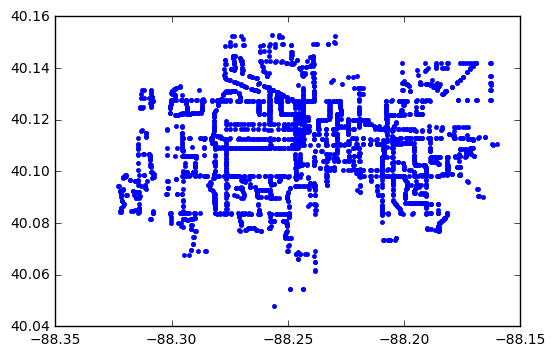

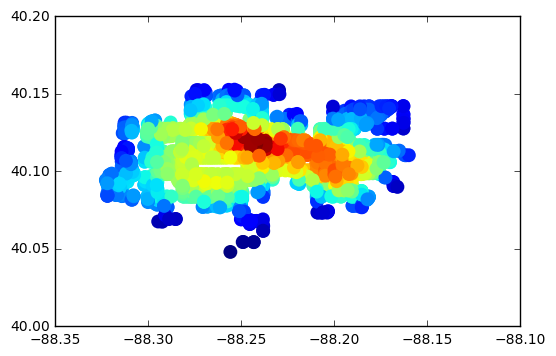

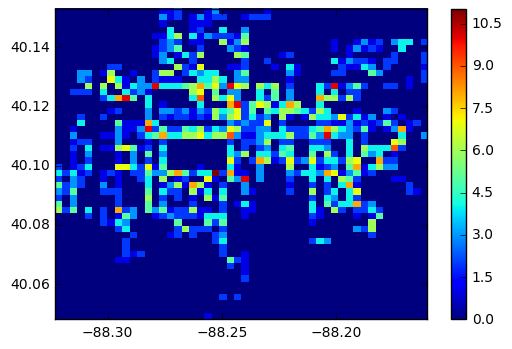

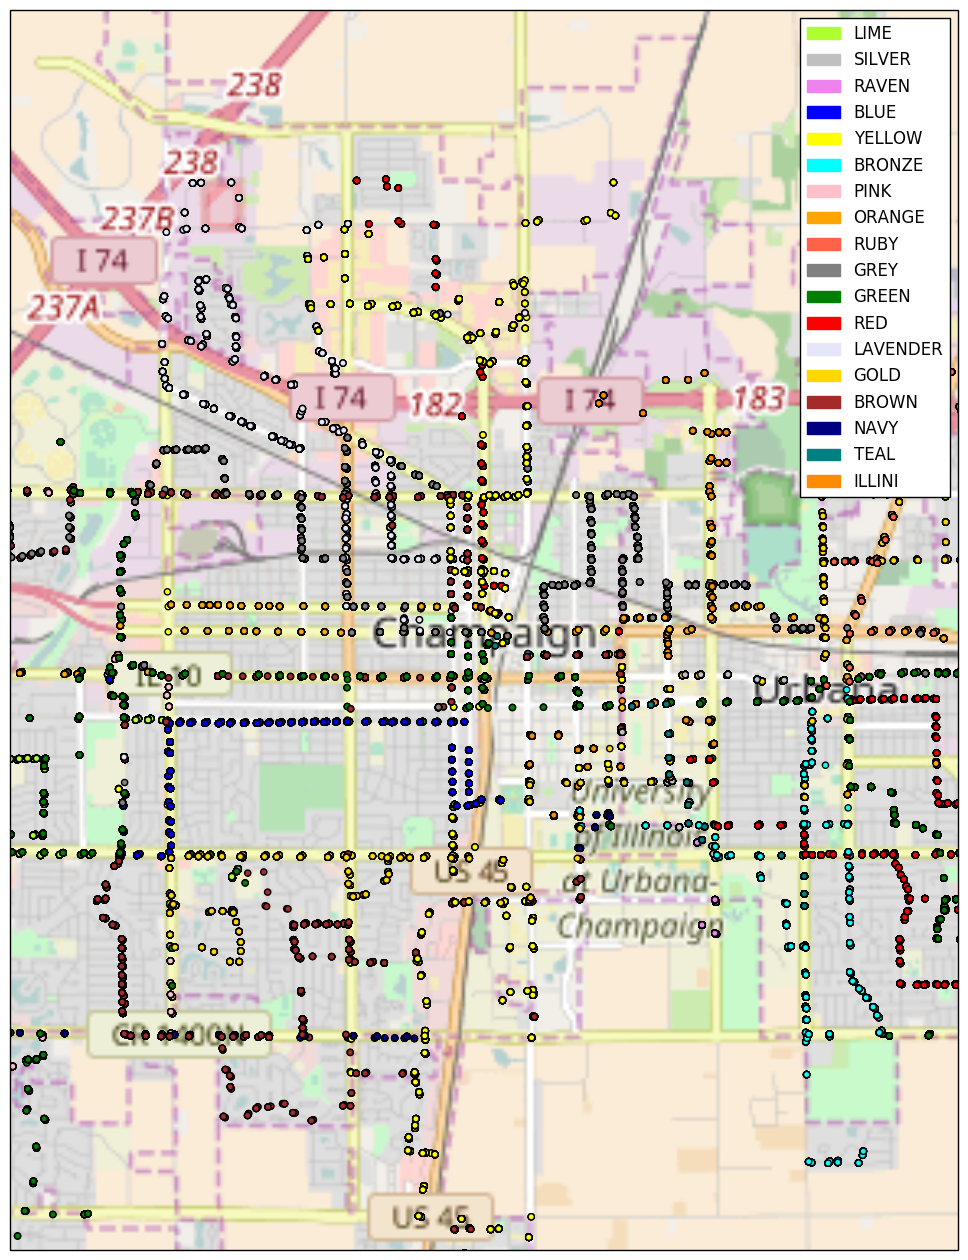

In [18]:
# Here and below is Yikai's contribution
# %load viz_yikai.py
import csv
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from collections import Counter
from cartopy.io.img_tiles import OSM
from scipy.stats import gaussian_kde

dataset_stop = open("/home/hanlinz3/work/data-readonly/CUMTD/stops.txt")
data_csv1= csv.reader(dataset_stop)
header1 = next(data_csv1)

data_stop = {}
for name in header1:
    data_stop[name] = []
data_stop

for row in data_csv1:
    for name, value in zip(header1, row):
        data_stop[name].append(value)
        
plt.plot(data_stop['stop_lon'],data_stop['stop_lat'],'.')

sum(Counter(data_stop['stop_id']).values())

x = np.array(data_stop['stop_lat']).astype(np.float)
y = np.array(data_stop['stop_lon']).astype(np.float)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(y, x, c=z, s=100, edgecolor='')
plt.show()
plt.hist2d(y, x, (50, 50), cmap=plt.cm.jet)
plt.colorbar()

dataset_stoptime = open("/home/hanlinz3/work/data-readonly/CUMTD/stop_times.txt")
data_csv2= csv.reader(dataset_stoptime)
header2 = next(data_csv2)

data_stoptimes = {}
for name in header2:
    data_stoptimes[name] = []

for row in data_csv2:
    for name, value in zip(header2, row):
        data_stoptimes[name].append(value)


Counter(data_stoptimes['stop_id'])


dataset_routes = open("/home/hanlinz3/work/data-readonly/CUMTD/routes.txt")
data_csv3= csv.reader(dataset_routes)
header3 = next(data_csv3)

data_routes = {}
for name in header3:
    data_routes[name] = []

for row in data_csv3:
    for name, value in zip(header3, row):
        data_routes[name].append(value)
dataset_trips = open("/home/hanlinz3/work/dv_fnl_pj/CUMTD/trips_re.csv")
data_csv4= csv.reader(dataset_trips)
header4 = next(data_csv4)

data_trips = {}
for name in header4:
    data_trips[name] = []

for row in data_csv4:
    for name, value in zip(header4, row):
        data_trips[name].append(value)
        
c_routes = Counter(data_trips['route_id'])
c_routes
#numbers of trips on each routes

dataset_shapes = open("/home/hanlinz3/work/data-readonly/CUMTD/shapes.txt")
data_csv5 = csv.reader(dataset_shapes)
header5 = next(data_csv5)

data_shapes = {}
for name in header5:
    data_shapes[name] = []

for row in data_csv5:
    for name, value in zip(header5, row):
        data_shapes[name].append(value)
        
left = pd.DataFrame({'stop_id': data_stop['stop_id'], 'stop_lon': data_stop['stop_lon'],'stop_lat': data_stop['stop_lat']})
middle = pd.DataFrame({'stop_id': data_stoptimes['stop_id'], 'trip_id': data_stoptimes['trip_id']})
result1 = pd.merge(left, middle, on='stop_id')
right = pd.DataFrame({'route_id': data_trips['route_id'], 'trip_id': data_trips['trip_id']})
result2 = pd.merge(result1, right, on='trip_id')

result2

Counter(data_trips['route_id'])

import matplotlib.patches as mpatches
use_colours = {'GREEN': '#008000', 'BRONZE': '#00FFFF', 'TEAL': '#008080','BROWN':'#A52A2A','RUBY':'#FF6347','GOLD':'#FFD700','GREY':'#808080'
               ,'ILLINI':'#FF8C00','LAVENDER':'#E6E6FA','NAVY':'#000080','ORANGE':'#FFA500', 'PINK':'#FFC0CB','SILVER':'#C0C0C0','RAVEN':'#EE82EE'
               ,'YELLOW':'#FFFF00', 'LIME':'#ADFF2F','RED':'#FF0000','BLUE':'#0000FF'
              }
              
lat, lon=40.1164, -88.2434
dlat, dlon=0.05, 0.05
osm_tiles=OSM()

plt.figure(figsize=(16,16))
ax = plt.axes(projection=osm_tiles.crs)
ax.set_extent([lon-dlon,lon+dlon,lat - dlat, lat + dlat])
ax.add_image(osm_tiles,12)
ax.stock_img()

ax.scatter(list(result2['stop_lon']),list(result2['stop_lat']), 
             c=[use_colours[x] for x in result2['route_id']],transform=ccrs.PlateCarree())

c_patch=[]
for item, value in zip(use_colours.keys(),use_colours.values()):
    patch=mpatches.Patch(color=value, label=item)
    c_patch.append(patch)

ax.legend(handles=[c_patch[0],c_patch[1],c_patch[2],c_patch[3],c_patch[4],c_patch[5],c_patch[6],c_patch[7],c_patch[8],c_patch[9],
                    c_patch[10],c_patch[11],c_patch[12],c_patch[13],c_patch[14],c_patch[15],c_patch[16],c_patch[17]])
    
plt.show()

In [5]:
# Here and below is Hanlin's contribution
# %load load_data.py
"""
Created on Sun Apr  9 13:25:13 2017

@author: hanlinz
"""
#load data from file
agency = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/agency.txt")
calendar = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/calendar.txt")
calendar_dates = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/calendar_dates.txt")
fare_attributes = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/fare_attributes.txt")
fare_rules = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/fare_rules.txt")
routes = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/routes.txt")
shapes = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/shapes.txt")
stop_times = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/stop_times.txt")
stops = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/stops.txt")
trips = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/trips.txt")

#load data into df
stp_time = pd.DataFrame({'trip_id': stop_times['trip_id'], 'stop_times': stop_times['arrival_time'],
                         "stop_sequence": stop_times['stop_sequence'].astype('int64')})

#dic for data cleanning
diff = {}
diff['trip_id']=[]
diff['start_min']=[]
diff['stop_min']=[]
diff['start_time']=[]
diff['stop_time']=[]
diff['result']=[]
diff['stops']=[]

#get start and stop time
for i in range(0, len(stp_time)):
    if stp_time['stop_sequence'][i]==0 and i > 0:
        trip_id = stp_time['trip_id'][i]
        start_time = stp_time['stop_times'][i]
        stop_time = stp_time['stop_times'][i-1]
        start_min = start_time.split(":")[1]
        stop_min = stop_time.split(":")[1]
        diff['trip_id'].append(trip_id)
        diff['start_min'].append(start_min)
        diff['stop_min'].append(stop_min)
        diff['start_time'].append(start_time)
        diff['stop_time'].append(stop_time)
        diff['stops'].append(stp_time['stop_sequence'][i-1])

#add components missing, beginning and ending
diff['trip_id'].insert(0,"[@14.0.51708725@][4][1277756770140]/0__T4_UIMF")
diff['start_min'].insert(0,"25")
diff['stop_min'].insert(len(diff['stop_min'])+1,"09")
diff['start_time'].insert(0,"07:25:00")
diff['stop_time'].insert(len(diff['stop_min'])+1,"16:09:37")
diff['stops'].insert(len(diff['stops'])+1,"30")

#calculate travel time interval
start = np.array(diff['start_min'], dtype='int')
stop = np.array(diff['stop_min'], dtype='int')
for i in range (0, len(diff['stop_min'])):
    if stop[i] - start[i] < 0:
        diff['result'].append(stop[i] - start[i] +60)
    else:
        diff['result'].append(stop[i] - start[i]) 

#load into datafram        
df = pd.DataFrame({'trip_id': diff['trip_id'],'time intervals': diff['result'],
                   'start_times':diff['start_time'],'stop_times':diff['stop_time'],
                  'stops': diff['stops']})

#translate trip_id into route_name
merge = pd.DataFrame({'route_id': trips['route_id'], 'trip_id': trips['trip_id']})

#get rid of descriptions
for i in range(0, len(merge['route_id'])):
    temp = merge['route_id'][i].split(" ")[0]
    merge['route_id'][i] = temp

#get rid of hopper
for i in range(0, len(merge['route_id'])):
    if len(merge['route_id'][i])>9:
        temp = merge['route_id'][i][:-6]
        merge['route_id'][i] = temp

#get rid of numbers
for i in range(0, len(merge['route_id'])):
    if merge['route_id'][i][0] == '1':
        merge['route_id'][i] = "YELLOW"
    elif merge['route_id'][i][0] == '3':
        merge['route_id'][i] = "LAVENDER"
    elif merge['route_id'][i][0] == '5':
        merge['route_id'][i] = "GREEN"
    elif merge['route_id'][i][0] == '7':
        merge['route_id'][i] = "GREY"    
    elif merge['route_id'][i] == '10W':
        merge['route_id'][i] = "GOLD"  
        
temp_df1 = pd.merge(df, merge, on='trip_id')

In [6]:
temp_df1

,start_times,stop_times,stops,time intervals,trip_id,route_id
0,07:25:00,07:35:00,2,10,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,TEAL
1,07:35:00,07:50:00,15,15,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,TEAL
2,07:55:00,08:15:00,26,20,[@7.0.41893871@][3][1243541396687]/72__T4_UIMF,TEAL
3,08:16:00,08:35:00,22,19,[@7.0.41893871@][4][1243540851671]/4__T4_UIMF,TEAL
4,08:35:00,08:55:00,26,20,[@7.0.41893871@][3][1243541396687]/74__T4_UIMF,TEAL
5,08:56:00,09:15:00,22,19,[@7.0.41893871@][4][1243540851671]/6__T4_UIMF,TEAL
6,09:25:00,09:40:00,17,15,[@7.0.41893871@][3][1243541488843]/110__T4_UIMF,TEAL
7,09:51:00,10:05:00,15,14,[@14.0.51708725@][4][1275506079140]/6__T4_UIMF,TEAL
8,10:15:00,10:35:00,26,20,[@7.0.41893871@][3][1243541396687]/79__T4_UIMF,TEAL
9,10:36:00,10:55:00,22,19,[@7.0.41893871@][4][1243540851671]/11__T4_UIMF,TEAL


In [7]:
def bugsinyourhair(value):
    lat, lon=40.1164, -88.2434
    use_colours = {'GREEN': '#008000', 'BRONZE': '#00FFFF', 'TEAL': '#008080','BROWN':'#A52A2A','RUBY':'#FF6347','GOLD':'#FFD700','GREY':'#808080'
                   ,'ILLINI':'#FF8C00','LAVENDER':'#E6E6FA','NAVY':'#000080','ORANGE':'#FFA500', 'PINK':'#FFC0CB','SILVER':'#C0C0C0','RAVEN':'#EE82EE'
                   ,'YELLOW':'#FFFF00', 'LIME':'#ADFF2F','RED':'#FF0000','BLUE':'#0000FF'
                  }
    #devide into grade
    dlat, dlon=0.05, 0.05
    osm_tiles=OSM()
    plt.figure(figsize=(25,25))
    #collasp maps
    ax = plt.axes(projection=osm_tiles.crs)
    ax.set_extent([lon-dlon,lon+dlon,lat - dlat, lat + dlat])
    ax.add_image(osm_tiles,12)
    ax.stock_img()
    select = result2['route_id'] == value
    #project plot
    ax.scatter(list(result2['stop_lon'][select]),list(result2['stop_lat'][select]),
               c = use_colours[value], transform=ccrs.PlateCarree())

    plt.show()

In [8]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed
from IPython.display import display
from IPython.display import clear_output

In [9]:
busline = list(result2['route_id'].drop_duplicates().values)

In [10]:
busline_display = widgets.Dropdown(
    options=busline,
    description=u'Bus Line',
    disabled=False,
    continuous_update=True
)

In [11]:
display(busline_display)

In [12]:
select_busline = temp_df1['route_id'] == busline_display.value
timeline = list(temp_df1['start_times'][select_busline].drop_duplicates().values)

In [13]:
timeline_display = widgets.Dropdown(
    options=timeline,
    description=u'Bus Time Line',
    disabled=False,
    continuous_update=True
)

In [14]:
display(timeline_display)

In [15]:
def bugsinyourhair2(value):
    
    display(busline_display)
    display(timeline_display)
    
    select_time = temp_df1['start_times'] == timeline_display.value
    mean_time = temp_df1['time intervals'][select_busline][select_time].mean()
    lat, lon=40.1164, -88.2434
    if temp_df1['time intervals'][select_time].mean() > mean_time:
        use_colours = 'RED'
    else:
        use_colours = 'GREEN'
    use_colours
    #devide into grade
    dlat, dlon=0.1, 0.1
    osm_tiles=OSM()
    plt.figure(figsize=(16,16))
    #collasp maps
    ax = plt.axes(projection=osm_tiles.crs)
    ax.set_extent([lon-dlon,lon+dlon,lat - dlat, lat + dlat], ccrs.PlateCarree())
    ax.add_image(osm_tiles,12)
    ax.stock_img()
    select = result2['route_id'] == value
    #project plot
    ax.scatter(list(result2['stop_lon'][select]),list(result2['stop_lat'][select]),
               c = use_colours, transform=ccrs.PlateCarree())

<function __main__.bugsinyourhair2>

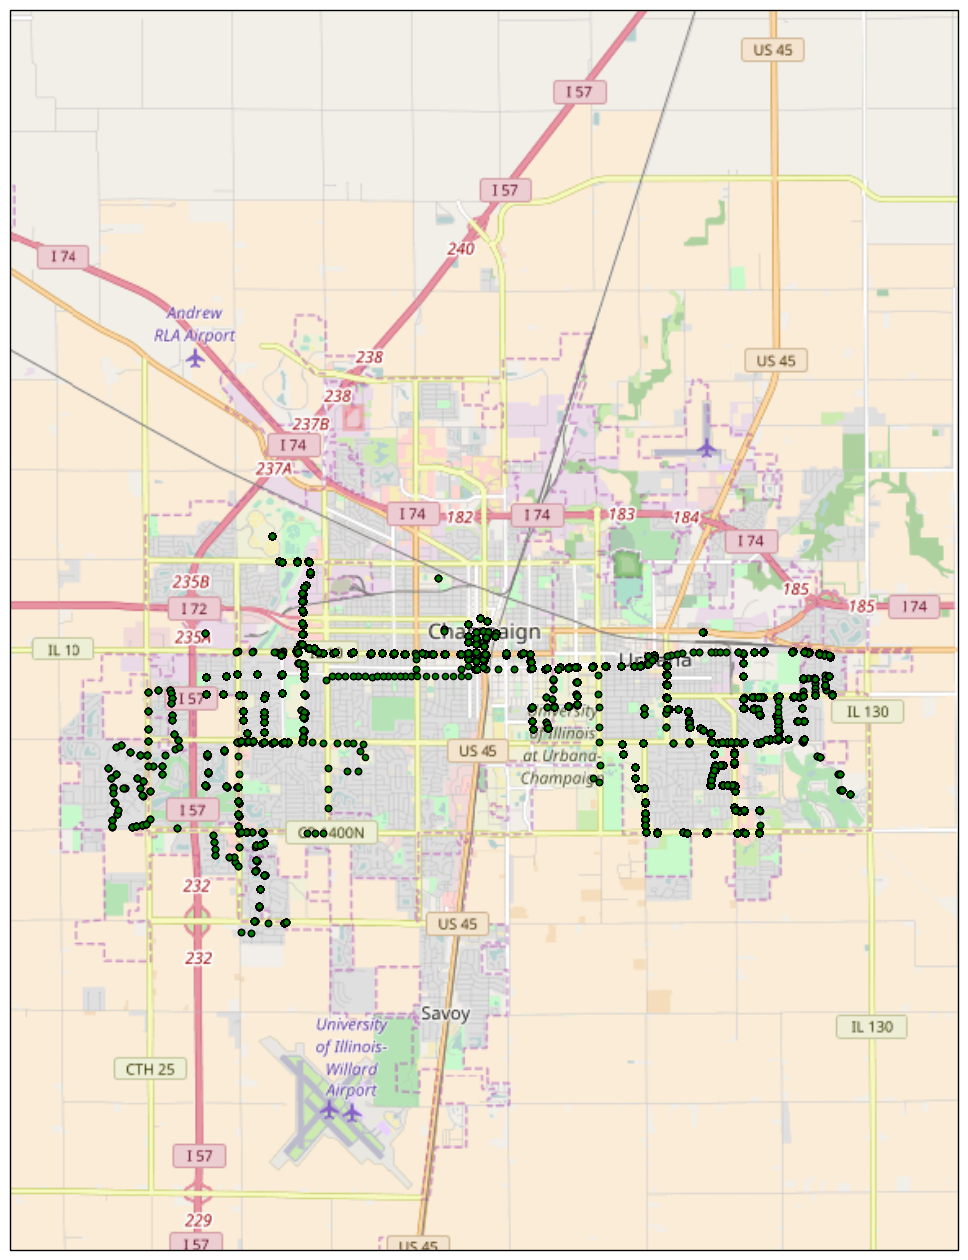

In [16]:
widgets.interact(bugsinyourhair2, value = busline_display.value)